In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score

In [2]:
df = pd.read_csv('test_all.csv')

In [3]:
mapping = {'Male': 0, 'Female': 1}

df = df.replace({'Lead': mapping})
true = df['Lead']

In [4]:
my_dict = {'name':[],'accuracy':[],'balanced_accuracy': [],'recall':[],'precision':[]}
my_df = pd.DataFrame(my_dict)

files = sorted(os.listdir())

for file in files:
    if file.startswith('projectgroup'):
        pred = pd.read_csv(file, header=None).T
        
        length = len('projectgroup')
        rounding = 3
        try:
            name = 'group {}'.format(file[length:].split("_",)[0])
            accuracy = np.round(accuracy_score(true,pred),rounding)
            balanced_accuracy = np.round(balanced_accuracy_score(true,pred),rounding)
            recall = np.round(recall_score(true,pred),rounding)
            precision = np.round(precision_score(true,pred),rounding)
            my_df = my_df.append({'name':name,
                                  'accuracy':accuracy,
                                  'balanced_accuracy':balanced_accuracy,
                                  'recall':recall,
                                  'precision':precision}, ignore_index=True)
        except BaseException as e:
            print(e)
            print(file)

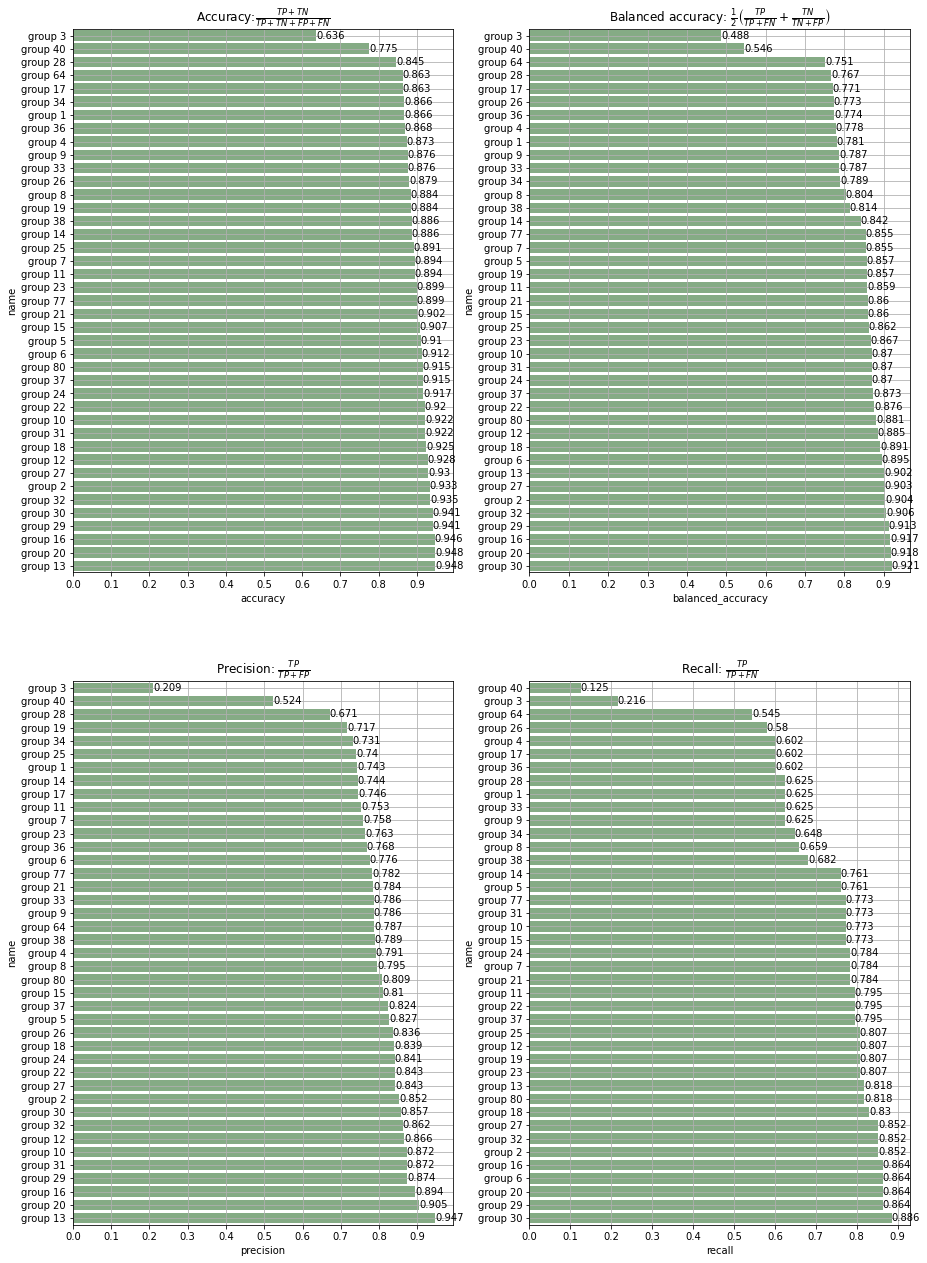

In [5]:
fig, ax = plt.subplots(2, 2,figsize=(15,22))

metric= 'accuracy'
temp_df = my_df.sort_values(by=[metric])
p1 = sns.barplot(ax=ax[0,0],data=temp_df, y="name", x=metric, color='darkgreen', alpha=0.5)
p1.bar_label(p1.containers[0])
ax[0,0].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[0,0].set_title('Accuracy:' + r'$\frac{TP+TN}{TP+TN+FP+FN}$')
ax[0,0].grid()


metric= 'balanced_accuracy'
temp_df = my_df.sort_values(by=[metric])
p1 = sns.barplot(ax=ax[0,1],data=temp_df, y="name", x=metric, color='darkgreen', alpha=0.5)
p1.bar_label(p1.containers[0])
ax[0,1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[0,1].set_title('Balanced accuracy: ' + r'$\frac{1}{2}\left(\frac{TP}{TP+FN}+\frac{TN}{TN+FP}\right)$')
ax[0,1].grid()

metric= 'precision'
temp_df = my_df.sort_values(by=[metric])
p1 = sns.barplot(ax=ax[1,0],data=temp_df, y="name", x=metric, color='darkgreen', alpha=0.5)
p1.bar_label(p1.containers[0])
ax[1,0].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[1,0].set_title('Precision: ' + r'$\frac{TP}{TP+FP}$')
ax[1,0].grid()

metric= 'recall'
temp_df = my_df.sort_values(by=[metric])
p1 = sns.barplot(ax=ax[1,1],data=temp_df, y="name", x=metric, color='darkgreen',alpha=0.5)
p1.bar_label(p1.containers[0])
ax[1,1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[1,1].set_title('Recall: ' + r'$\frac{TP}{TP+FN}$')
ax[1,1].grid()

'0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,'